1000 500.0
[0.002, 0.08] [0.001, 0.12]


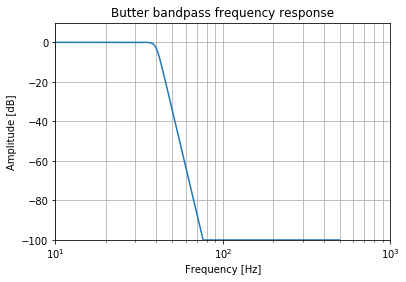

In [13]:
import scipy.signal as signal
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fs = 1000

fn = fs/2

fc0 = 1 # comienzo de la banda de paso
fs0 = fc0 * 0.5 # fin de la banda de detenida 0

fc1 = 40 # fin de la banda de paso
fs1 = fc1 * 1.5 # comienzo de la banda de detenida 1

wp = [fc0/fn, fc1/fn]
ws = [fs0/fn, fs1/fn]
print(fs, fn)
print(wp, ws)


sos = signal.iirfilter(17, [fc0, fc1], btype='band',
                       analog=False, ftype='butter', fs=1000,
                       output='sos')
w, h = signal.sosfreqz(sos, 1000, fs=1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Butter bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()